In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dados_prod = []

In [3]:
for i in open('Prod_Hec_mes1.txt', 'r'):
    dados_prod.append(float((i[:-1])))

In [4]:
len(dados_prod)

132

In [5]:
datas = []

In [16]:
for i in open('Pdata.txt', 'r'):
    datas.append(i[:-1])

In [17]:
len(datas)

132

In [18]:

chuva_mes = []


caminho = 'chuva_mes.csv'

with open(caminho) as csvfile:
    leitor_csv = csv.reader(csvfile)
    
    
    for linha in leitor_csv:
        chuva_mes.append(linha)


In [19]:
prod_mes = []


caminho = 'valores_mes.csv'

with open(caminho) as csvfile:
    leitor_csv = csv.reader(csvfile)
    
    
    for linha in leitor_csv:
        prod_mes.append(linha)

In [20]:
chuva = []
for i in chuva_mes:
    for j in i:
        chuva.append(float(j))


In [21]:
produção = []
for i in prod_mes:
    for j in i:
        produção.append(float(j))


In [137]:
weather_df = pd.DataFrame({
    'Produção (T/Hec)': produção,
    'chuva (mm)': chuva
}, index=datas)

In [151]:
weather_df

,Produção (T/Hec),chuva (mm)
janeiro 2013,3.599,5.01
fevereiro 2013,3.599,12.64
março 2013,3.599,8.37
abril 2013,3.925,3.25
maio 2013,3.816,6.93
...,...,...
agosto 2023,4.561,4.70
setembro 2023,4.553,4.53
outubro 2023,4.108,12.34
novembro 2023,3.184,5.61


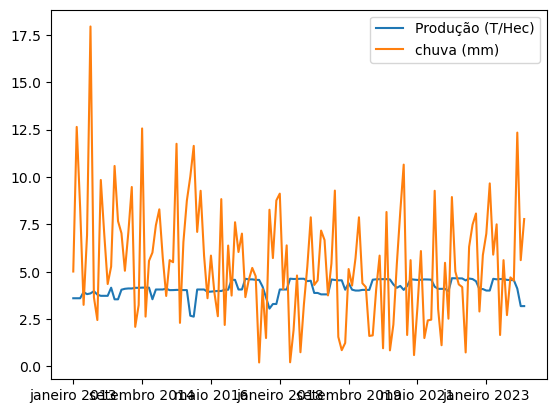

In [32]:
weather_df.plot()
plt.savefig('grafico_producao_chuva_simples.png')

<AxesSubplot:>

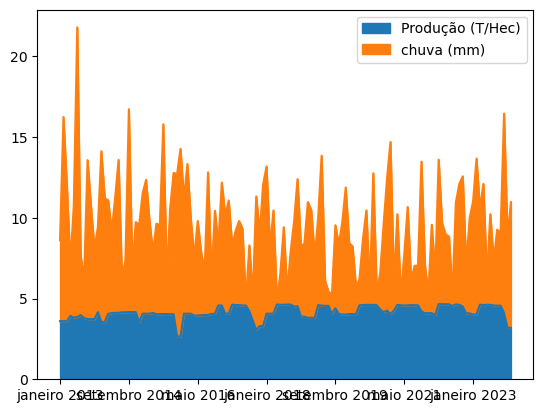

In [33]:
weather_df.plot.area()

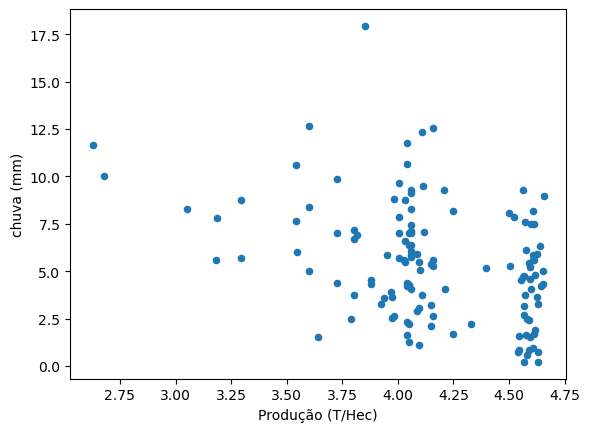

In [34]:
weather_df.plot.scatter(x="Produção (T/Hec)", y="chuva (mm)");
plt.savefig('grafico_producao_chuva_dispersao.png')

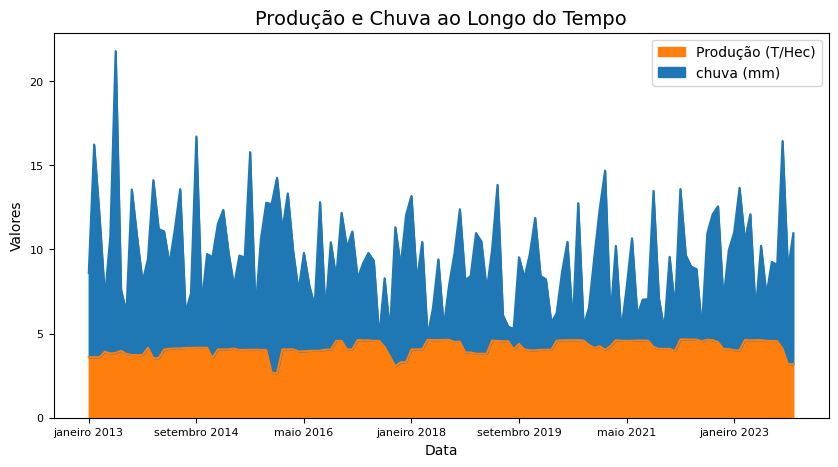

In [152]:
    #plotando gráfico 
    cores = ['#ff7f0e', '#1f77b4'] 
    ax = weather_df.plot.area(figsize=(10, 5), title='Produção e Chuva ao Longo do Tempo', color = cores)
    # FONTE
    
    
    ax.set_xlabel('Data', fontsize=10)
    ax.set_ylabel('Valores', fontsize=10)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.title.set_size(14)
    
    plt.savefig('grafico_producao_chuva_dispersao_10_anos.png')

In [24]:
weather_df1 = pd.DataFrame({
    'Produção (T/Hec)': produção,
    'chuva (mm)': chuva,
    'data': datas
})

In [25]:
weather_df1['ano'] = weather_df1['data'].str.split().str[1]

In [26]:
weather_df1

,Produção (T/Hec),chuva (mm),data,ano
0,3.599,5.01,janeiro 2013,2013
1,3.599,12.64,fevereiro 2013,2013
2,3.599,8.37,março 2013,2013
3,3.925,3.25,abril 2013,2013
4,3.816,6.93,maio 2013,2013
...,...,...,...,...
127,4.561,4.70,agosto 2023,2023
128,4.553,4.53,setembro 2023,2023
129,4.108,12.34,outubro 2023,2023
130,3.184,5.61,novembro 2023,2023


In [27]:
#grupos_df = weather_df1.groupby[['prod','chuva']](['ano']).mean()
grupos_df = weather_df1.groupby('ano').mean()

In [28]:
grupos_df

,Produção (T/Hec),chuva (mm)
ano,,
2013,3.791167,7.224167
2014,3.982583,6.580833
2015,3.816167,7.278333
2016,4.103750,5.580833
2017,4.047750,4.982500
2018,4.340417,4.376667
2019,4.180333,4.913333
2020,4.369500,3.955833
2021,4.398417,3.965000


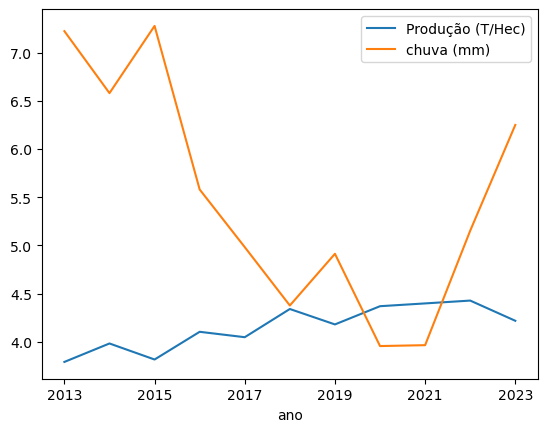

In [29]:
grupos_df.plot()
plt.savefig('grafico_simples_ano).png')

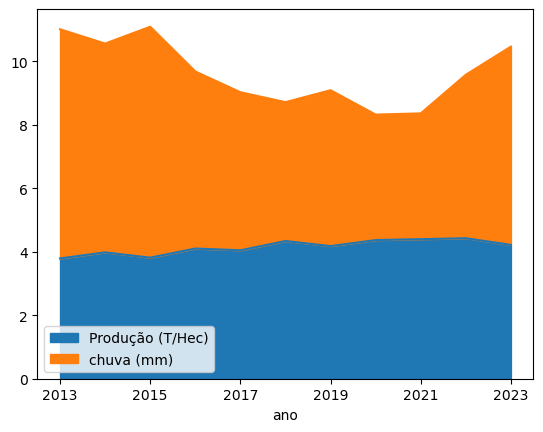

In [30]:
grupos_df.plot.area()
plt.savefig('média_ano_simples.png')

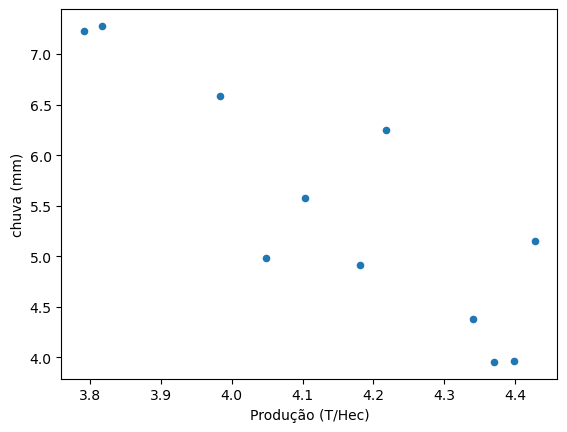

In [31]:
grupos_df.plot.scatter(x="Produção (T/Hec)", y="chuva (mm)");


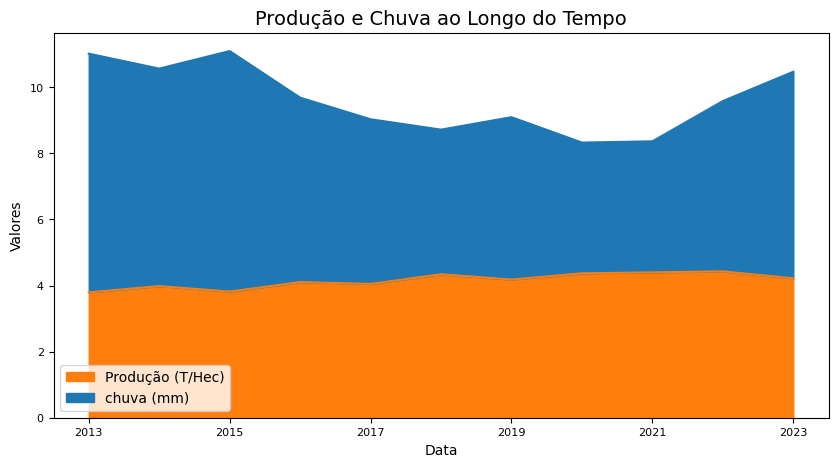

In [149]:
    #plotando gráfico 
    cores = ['#ff7f0e', '#1f77b4'] 
    ax = grupos_df.plot.area(figsize=(10, 5), title='Produção e Chuva ao Longo do Tempo', color = cores)
    # FONTE
    
    
    ax.set_xlabel('Data', fontsize=10)
    ax.set_ylabel('Valores', fontsize=10)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.title.set_size(14)

In [35]:
# These modules make it easier to perform the calculation
import numpy as np
from scipy import stats

# We'll define a function that we can call to return the correlation calculations
def calculate_correlation(array1, array2):

    # Calculate Pearson correlation coefficient and p-value
    correlation, p_value = stats.pearsonr(array1, array2)

    # Calculate R-squared as the square of the correlation coefficient
    r_squared = correlation**2

    return correlation, r_squared, p_value

# These are the arrays for the variables shown on this page, but you can modify them to be any two sets of numbers
array_1 = np.array(produção)
array_2 = np.array(chuva)
array_1_name = "Produção por mês em T/hectare"
array_2_name = "Média de Chuva por mês"

# Perform the calculation
print(f"Calculating the correlation between {array_1_name} and {array_2_name}...")
correlation, r_squared, p_value = calculate_correlation(array_1, array_2)

# Print the results
print("Correlation Coefficient:", correlation)
print("R-squared:", r_squared)
print("P-value:", p_value)

Calculating the correlation between Produção por mês em T/hectare and Média de Chuva por mês...
Correlation Coefficient: -0.39134168596718155
R-squared: 0.15314831517563615
P-value: 3.48689371445452e-06


In [37]:
#tentar criar para cada ano separado agora

meses_df = weather_df1.groupby('ano').sum()
#meses_df = weather_df1.groupby([['Produção (T/Hec)','chuva (mm)']])(['ano'])

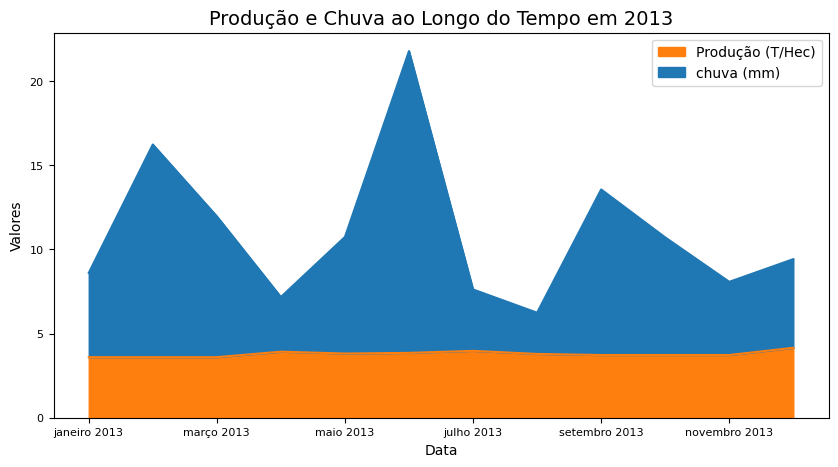

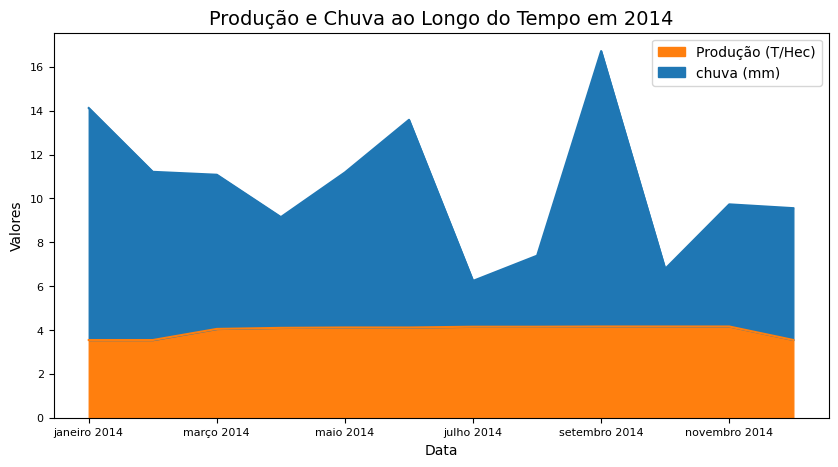

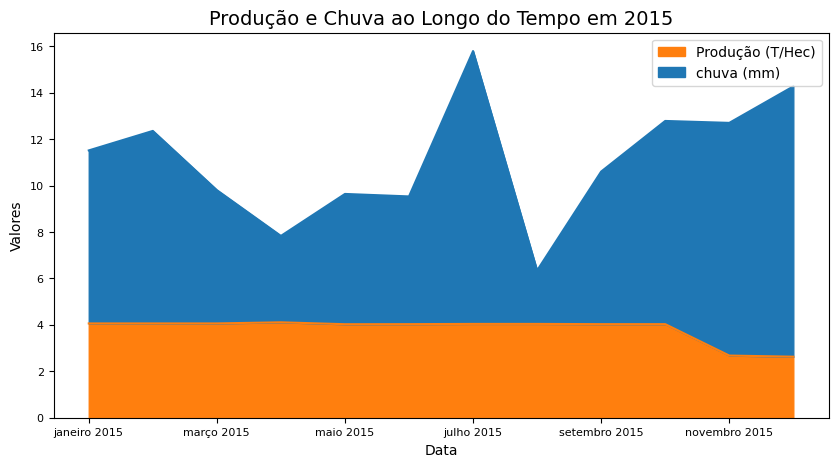

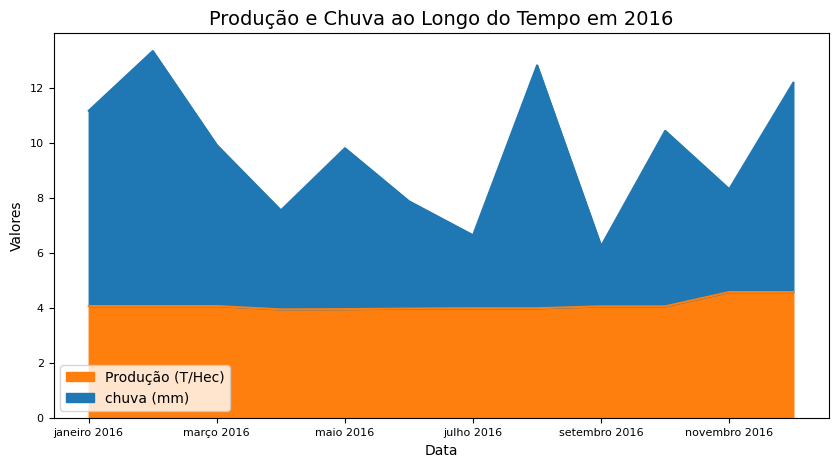

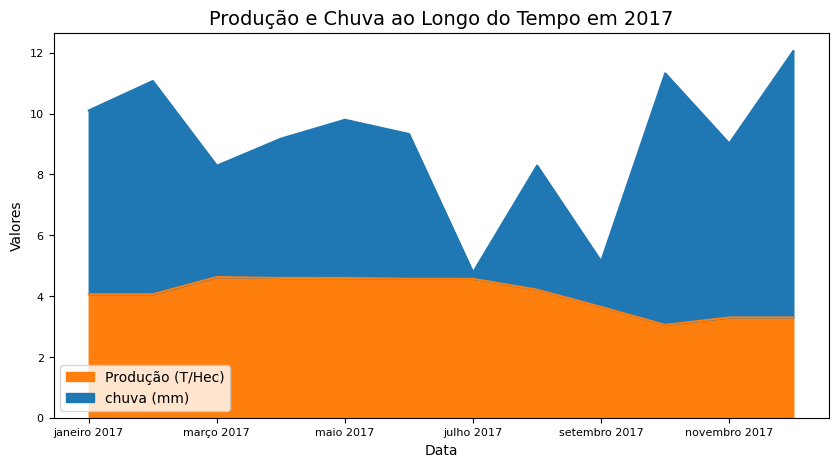

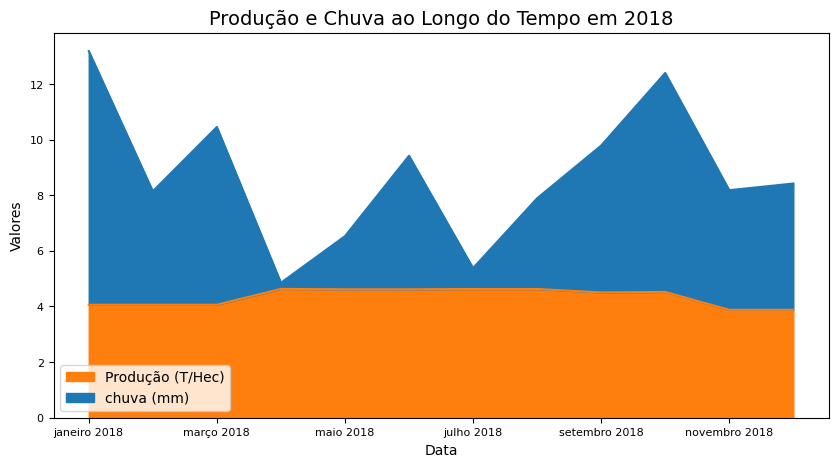

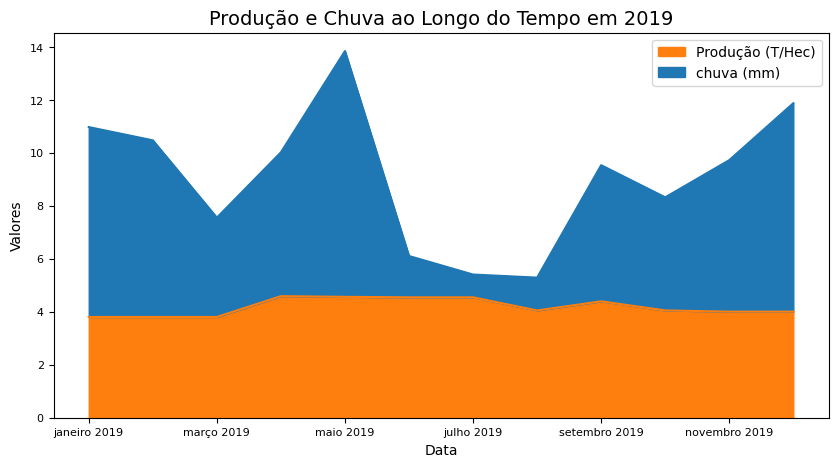

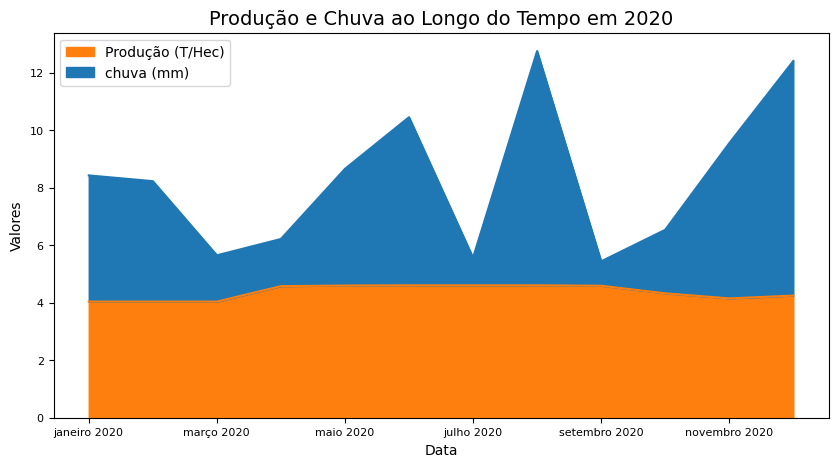

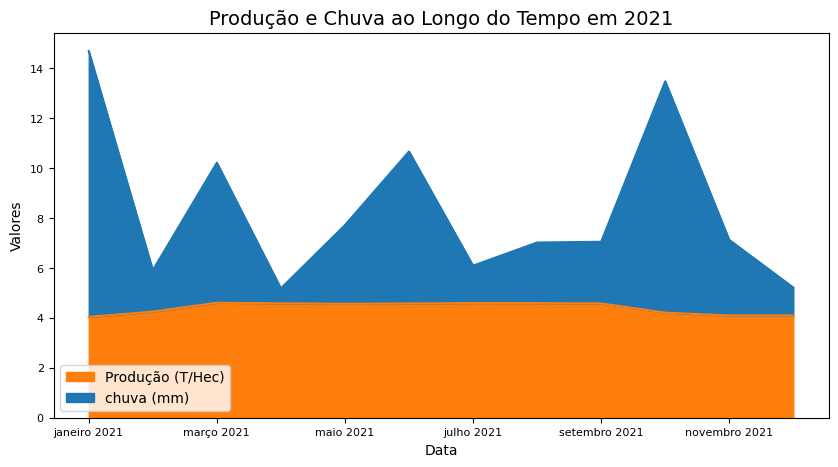

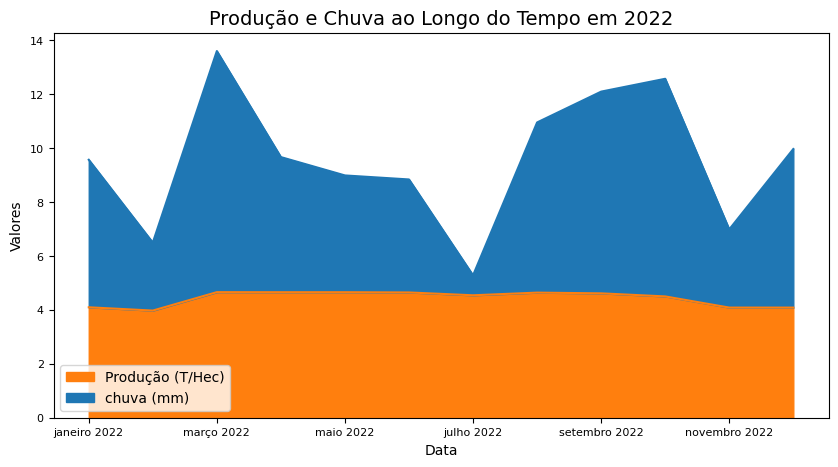

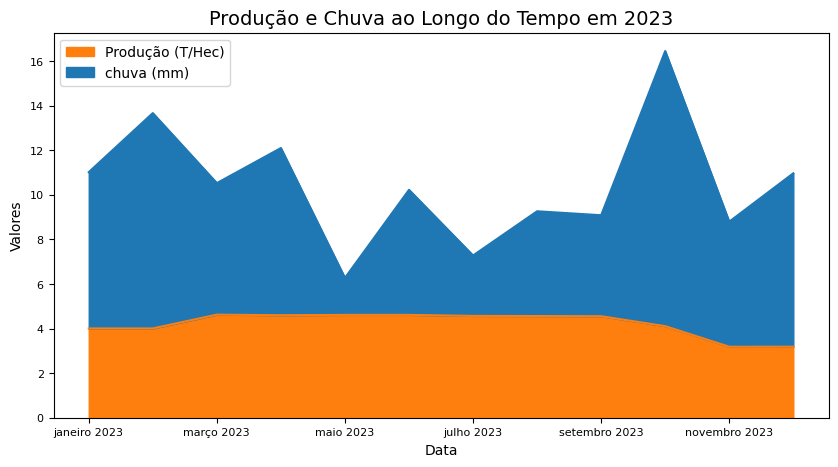

In [147]:
n = 2013
while n <= 2023:
    x = str(n)
    grupos_df01 = weather_df1.groupby('ano').get_group(x)
    grupos_df01.set_index('data', inplace=True)
    
    #plotando gráfico 
    cores = ['#ff7f0e', '#1f77b4'] 
    ax = grupos_df01.plot.area(figsize=(10, 5), title='Produção e Chuva ao Longo do Tempo em ' + x, color = cores)
    # FONTE
    
    
    ax.set_xlabel('Data', fontsize=10)
    ax.set_ylabel('Valores', fontsize=10)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.title.set_size(14)
    n +=1
    
    plt.savefig('grafico_producao_chuva_por_ano' + x)